In [4]:
from math import factorial
from math import exp, pi, sqrt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import truncnorm
import scipy

from numpy import trapz

def combination(n, k):
    return int(factorial(n) / factorial(k) / factorial(n - k))

def arrangements(n, k):
    return int(factorial(n) / factorial(n - k))

### Задача 1

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

In [44]:
X = zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
Y = ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
X, Y

(array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110]),
 array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]))

In [45]:
n = len(X)
n

10

In [46]:
stdX = X.std()
stdX

59.115480206118605

In [47]:
varX = X.var()
varX

3494.6400000000003

In [48]:
stdY = y.std()
stdY

174.55340157098058

In [49]:
varY = Y.var()
varY

30468.890000000007

In [63]:
XY_cov_m = np.cov(X, Y, ddof=0)
XY_cov_m

array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

In [146]:
t1 = 0  ## К-т корреляции
t2 = 0
t3 = 0
c = 0 
k = 0
for i in range(0,len(X)):
    t1 = t1 + (X[i]-X.mean())*(Y[i]-Y.mean())
    t2 = t2 +  (X[i]-X.mean())**2
    t3 = t3 +  (Y[i]-Y.mean())**2
k = t1/np.sqrt(t2*t3)
c = t1 / len(X) -1
print('R-n  корреляции',k, 'Ковариация', c)

R-n  корреляции 0.8874900920739162 Ковариация 9156.84


In [147]:
VAL = np.vstack((X, Y))
R_xy_m = np.corrcoef(VAL)
R_xy_m

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

In [148]:
R_xy = c/(stdX*stdY)
R_xy

0.8873931816570412

In [149]:
a = R_xy/stdX*stdY
a

2.6202527298949243

In [150]:
a = np.cov(X, Y, ddof=0)[0, 1] / np.var(X, ddof=0)
a

2.6205388824027653

In [151]:
b = Y.mean()-b1*X.mean()
b

-44329.68403269007

In [152]:
a = (np.mean(X*Y)-np.mean(X)*np.mean(Y))/(np.mean(X**2)-np.mean(X)**2)
b = np.mean(Y)-b1*np.mean(X)
a,b

(2.620538882402765, -44329.68403269007)

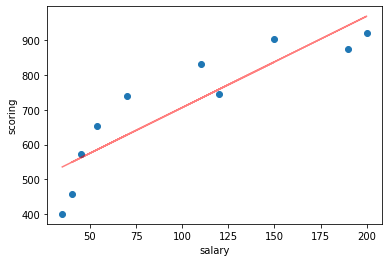

In [160]:
ox = X
oy =  a * X +b

plt.scatter(X, Y)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('salary')
plt.ylabel('scoring');

In [161]:
n=len(Y)
a = (np.sum(X)*np.sum(Y) - n*np.sum(X*Y))/(np.sum(X)*np.sum(X) - n*np.sum(X*X))
b = (np.sum(Y) - a*np.sum(X))/n

A = np.vstack([X, np.ones(len(X))]).T
a1, b1 = np.linalg.lstsq(A, Y)[0]   # метод наименьших квадратов 
print(a, b)
print(a1, b1)

2.6205388824027653 444.1773573243596
2.6205388824027653 444.17735732435966


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


__Средняя ошибка апроксимации__:
$$\overline{A} = \frac{1}{n} \sum\limits_{i=1}^{n} \Bigl |{{\frac{y_i - \hat{y}_i}{y_i}} \Bigr |} \cdot{100\%}$$


In [162]:
A = 100/len(Y)*np.sum(np.abs((Y-oy)/Y))  # средняя ошибка апроксимации
A

11.46925184356171

In [163]:
def mean_approximation_error(y_real: np.ndarray, y_pred: np.ndarray) -> float:
    """Средняя ошибка аппроксимации.
    """
    
    return np.abs((y_real - y_pred) / y_real).mean()

In [164]:
mean_approximation_error(Y, oy)

0.11469251843561709

__Коэффициент детерминации__:
$$R^2 = 1 - \dfrac{\sigma^2_{res}}{\sigma^2_{y}}$$


In [165]:
R1 = 1 - (oy - Y).var() / Y.var()
R1

0.7876386635293685

In [166]:
np.corrcoef(Y, oy) ** 2

array([[1.        , 0.78763866],
       [0.78763866, 1.        ]])

**Стандартная ошибка** $s_{ост}$ рассчитывается по формуле:
$$S_{ост} = \sqrt{\frac{\sum\limits_{i=1}^{n}(y_i - \hat{y}_i)^2}{n - 2}}$$

In [167]:
# Стандартная ошибка   апроксимации
Est = np.sqrt(np.sum((Y-oy)**2)/(n-2))
Est

89.93340731602925

### Оценка значимости уравнения линейной регрессии

Оценить статистическую значимость уравнения линейной регрессии в целом можно с помощью __F-критерия Фишера__. Проверяется нулевая гипотеза о том, что все коэффициенты при факторах у регрессионной модели равны нулю (т.е. модель представляет из себя горизонтальную плоскость.)

Используемая здесь статистика:
$$F = \dfrac{R^2 / k}{(1 - R^2) / (n - k - 1)},$$
где $R^2$ — коэффициент детерминации, $n$ — число наблюдений, $k$ — число факторов. В литературе часто используются обозначения $k_1 = k$, $k_2 = n - k - 1$ (иногда вместо $k_1$, $k_2$ пишут также $f_1$, $f_2$).


In [168]:
f1 = 2
f2 = n-f1-1

In [169]:
# F-критерий Фишера позволяет оценить значимость уравнения линейной регрессии в целом. Определим по таблице f1=2 f2 =7

Fcr = 4.74


In [170]:
from scipy import stats
F_crit = stats.f.ppf(1 - 0.05, f1, f2)
F_crit

4.73741412777588

In [171]:
Ffact = R1/f1/((1-R1)/f2)
Ffact

12.981342876103215

$F_{факт} > F_{кр}$,  уравнение регрессии признается статистически значимым.

Для оценки статистической значимости параметров регрессии воспользуемся  𝑡 -статистикой Стьюдента и также рассчитаем

доверительные интервалы каждого из показателей. При  𝑑𝑓=𝑛−2=10−2=8 и  𝛼=0.05  получим по таблице

$$t_{кр} = 2.306$$

Определим стандартную ошибку $S_{ост}$ (переменная **s_residual**) и случайные ошибки $m_a, \; m_b$:

$$m_b = \frac{S_{ост}}{\sigma_x \cdot{\sqrt{n}}}$$

$$m_a  = S_{ост} \cdot {\frac{\sqrt{\sum{x^2}}}{n \cdot {\sigma_x}}}$$

In [172]:
s_residual = np.sqrt(np.sum((Y - oy)**2) / (n - 2))
m_a = s_residual * np.sqrt(np.sum(X ** 2)) / (n * np.std(X))
m_b = s_residual / (np.std(X) * np.sqrt(n))

print('s_residual = {}\nm_a = {}\nm_b = {}'.format(s_residual, m_a, m_b))

s_residual = 89.93340731602925
m_a = 56.466497550681524
m_b = 0.48108279568516


Вычислим наблюдаемые значения критерия $t_a$ и $t_b$:

In [173]:
t_a = a / m_a
t_a

0.046408737854702245

In [174]:
t_b = b / m_b
t_b

923.286721762229

Далее необходимо найти доверительные интервалы для параметров регрессии $a$ и $b$.   Рассчитываем предельную ошибку для каждого показателя:

$$\Delta_a = t_{кр} \cdot m_a; \; \Delta_b = t_{кр} \cdot m_b.$$

In [182]:
da = t_a*m_a
da

2.6205388824027653

In [183]:
db = t_b*m_b
db

444.1773573243596

__Доверительные интервалы__
$$\gamma_a = a \pm \Delta_a; \; \gamma_b = b \pm \Delta_b.$$

In [180]:
di_A = (a-da, a+da)
di_A

(0.0, 5.241077764805531)

In [181]:
di_B = (b-db, b+db)
di_B

(0.0, 888.3547146487192)

При  парной регрессии с помощью t-распределения Стьюдента можно построить доверительные интервалы для коэффициентов регрессии.

Построим доверительный интервал коэффициента наклона $b_1$ (из уравнения $y = b_0 + b_1 \cdot x$). Нам понадобится значение __стандартной ошибки коэффициента наклона__. Она вычисляется по формуле:
$$S_{slope} = \sqrt{\dfrac{\frac{1}{n - 2} \displaystyle\sum_{i=1}^{n}(y_i - z_i)^2}{\displaystyle\sum_{i=1}^n (x_i - \overline{x})^2}},$$
где:
* $x$, $x_i$ — соответственно, все значения и конкретное значение фактора
* $y_i$ — конкретное значение оцениваемой (целевой) переменной
* $z_i$ — «предсказанное» значение, полученное с помощью модели регрессии
* $n$ — число элементов в выборке


In [187]:
Ssl = np.sqrt(1/n-2*(np.sum(Y-oy)**2)/np.sum((X-X.mean()**2)))
Ssl

0.31622776601683794

Пусть $b_1$ — реальное значение этого коэффициента. Тогда статистика
$$T = \dfrac{\hat{b}_1 - b_1}{S_{slope}}$$
имеет распределение Стьюдента с $n - 2$ степенями свободы. Для выбранного нами уровня доверия $p = 1 - \alpha$ доверительный интервал выглядит следующим образом:
$$P \left( \hat{b}_1 - t_{1 - \alpha/2, \: n - 2} \cdot S_{slope} \leq b_1 \leq \hat{b}_1 + t_{1 - \alpha/2, \: n - 2} \cdot S_{slope} \right) = p$$


In [188]:
t = scipy.stats.t.ppf(0.975, n-2) #статистика T
t

2.3060041350333704

In [189]:
#Тогда интервал:
da = (a-t*Ssl, a+t*Ssl)
da

(1.891316346355572, 3.3497614184499587)

Аналогично можно построить доверительный интервал для коэффициента сдвига $b_0$. __Стандартная ошибка коэффициента сдвига__ вычисляется по формуле:
$$S_{intercept} = S_{slope} \cdot \sqrt{\dfrac{1}{n} \displaystyle\sum_{i=1}^n x_i^2}.$$

In [191]:
Sin = np.sqrt(1/n*np.sum(X**2))
Sin

117.37376197430157

In [192]:
db = (b-t*Ssl, b+t*Ssl)
db

(443.4481347883124, 444.9065798604068)

#### Задача 2

Квартет Энскомба — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

In [196]:
x1=np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y1=np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])

x2=np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y2=np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74])
   
x3=np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],)
y3=np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]) 
            
x4=np.array([8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0])
y4=np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89])
            

По каждой паре выборок посчитайте:

выборочное среднее и дисперсию каждой выборки,
коэффициент корреляции Пирсона и прямую линейной регрессии.
Убедившись в том, что они практически не отличаются, постройте scatter plot по каждой паре выборок

In [209]:
x1_var = x1.var()
x1_mean = x1.mean()
A = np.vstack((x1, np.ones(len(x1)))).T
a1, b1 = np.linalg.lstsq(A, y1, rcond=None)[0]
p1=stats.pearsonr(x1, y1)
print(x1_mean, x1_var, a1, b1, p1 )

9.0 10.0 0.9999999999999999 3.0879898432317326e-16 (1.0, 0.0)


In [210]:
x2_var = x2.var()
x2_mean = x2.mean()
A = np.vstack((x2, np.ones(len(x2)))).T
a2, b2 = np.linalg.lstsq(A, y2, rcond=None)[0]
p2=stats.pearsonr(x2, y2)
print(x2_mean, x2_var, a2, b2, p2 )

9.0 10.0 0.49999999999999994 3.000909090909089 (0.8162365060002427, 0.0021788162369108027)


In [211]:
x3_var = x3.var()
x3_mean = x3.mean()
A = np.vstack((x3, np.ones(len(x3)))).T
a3, b3 = np.linalg.lstsq(A, y3, rcond=None)[0]
p3=stats.pearsonr(x3, y3)
print(x3_mean, x3_var, a3, b3, p3 )

9.0 10.0 0.4997272727272728 3.002454545454544 (0.8162867394895982, 0.002176305279228025)


In [212]:
x4_var = x4.var()
x4_mean = x4.mean()
A = np.vstack((x4, np.ones(len(x4)))).T
a4, b4 = np.linalg.lstsq(A, y4, rcond=None)[0]
p4=stats.pearsonr(x4, y4)
print(x4_mean, x4_var, a4, b4, p4 )

9.0 10.0 0.4999090909090907 3.001727272727273 (0.8165214368885029, 0.002164602347197218)


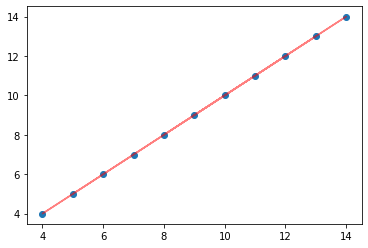

In [213]:
oy1 =  a1 *x1 +b1
plt.scatter(x1, y1)
plt.plot(x1, oy1, color='red', alpha=0.5)

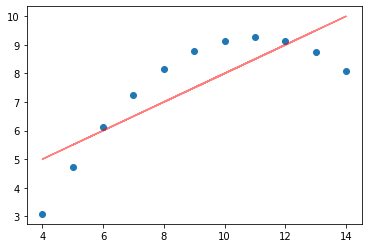

In [214]:
oy2 =  a2 *x2 +b2
plt.scatter(x2, y2)
plt.plot(x2, oy2, color='red', alpha=0.5)

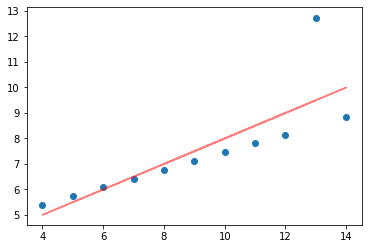

In [215]:
oy3 =  a3 *x3 +b3
plt.scatter(x3, y3)
plt.plot(x3, oy3, color='red', alpha=0.5)

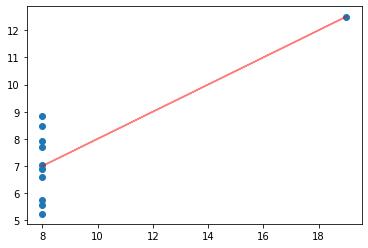

In [216]:
oy4 =  a4 *x4 +b4
plt.scatter(x4, y4)
plt.plot(x4, oy4, color='red', alpha=0.5)